In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


# Definición del modelo inflacionario y obtención de los datos del background

In [2]:
V = '0.5*m**2*phi**2'
param = {'m': 5.9e-6}

#Instancia de la clase potential
potential = PotentialFunction.from_string(V, param_values= param)

In [3]:
#Instancia de la clase background
bg = Background(potential, phi0 = 17.5)

In [5]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (bg.data(save=True)[i] for i in vars)
Nend = bg.N_end
Ne = bg.Ne

Figure saved as: figures/potential.png


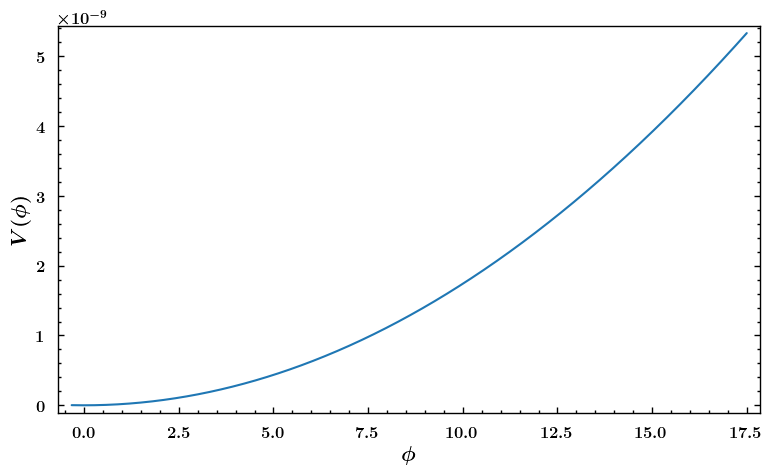

In [6]:
potential.plot_potential(min(phi), max(phi), dpi = 100, save = True)

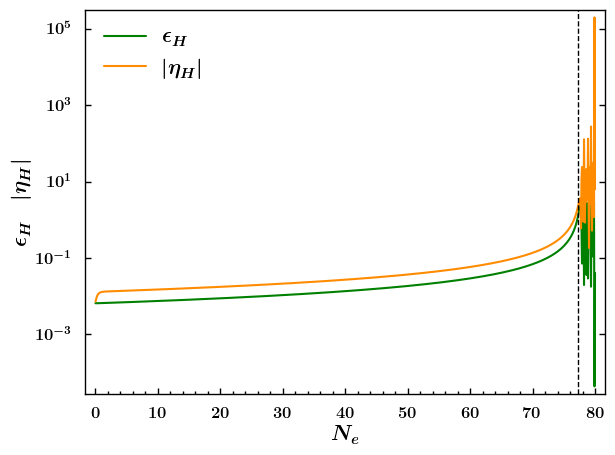

In [7]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')
plt.axvline(Nend, linewidth = 1, linestyle = 'dashed', color = 'k')


plt.yscale('log')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')
plt.tight_layout()
plt.show()


# Perturbaciones primordiales y espectro primordial de potencias

In [8]:
pert = Perturbations(potential, bg, scale= 'CMB', N_CMB = 60)
k = pert.k_CMB
Npivot = pert.N_hc(k = k)
Nin = pert.N_ini(k = k)
Nshs = pert.N_shs(k = k)
sol = pert.solver()


In [9]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)

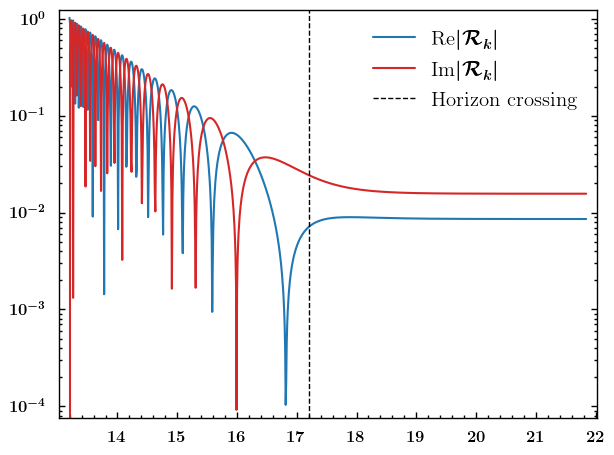

In [10]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}|\mathcal{R}_k|$')
plt.semilogy(N, abs(R_im), label = r' $\text{Im}|\mathcal{R}_k|$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


### Espectro de potencias escalar y tensorial, y la razon tenso-escalar evaluados en la escala pivote $k_* = 0.05 \text{Mpc}^{-1}$

In [11]:
P_s_pivot, P_t_pivot, r_pivot

(np.float64(2.020391532155706e-09),
 np.float64(2.6735428645870755e-10),
 np.float64(0.13232795832075545))

### Cálculo del espectro de potencias para los modos observables del CMB $k \in [10^{-4}, 10]\, \text{Mpc}^{-1}$

In [12]:
PS = pert.Power_spectrum(save = True)[0]

/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:583: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

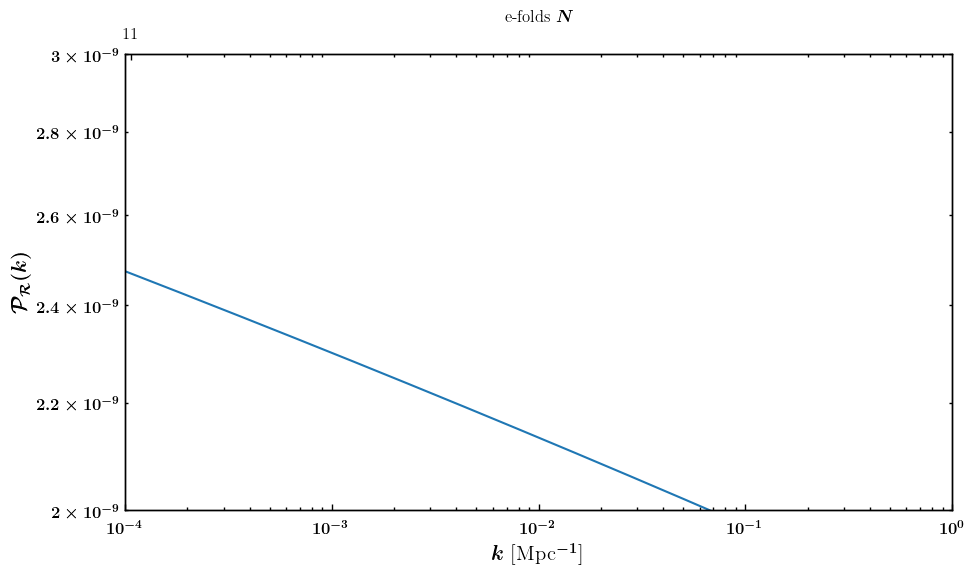

In [13]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save = True)


Figure saved as: Figures/tensor_to_scalar_ratio.png


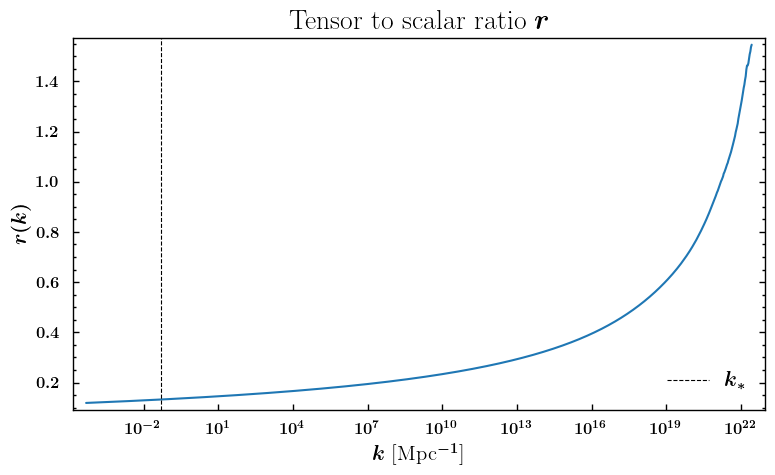

In [14]:
pert.Plot_r(dpi = 100, save = True)

In [15]:
print(pert.Spectral_tilts)


{'n_s': 0.9657053780003747, 'n_t': -0.017665173859175647}
